# Compile photoswitch results


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(["science", "nature"])
from glob import glob
from fastcore.utils import load_pickle

from gpt3forchem.helpers import get_else_nan, mean_confidence_interval


## Classification


In [16]:
all_classification_data = glob("results/photoswitch_20220913_4epoch/*.pkl")


In [4]:
all_augmentation_res = glob("results/20220913_photoswitch_augment/*.pkl")


In [17]:
load_pickle(all_classification_data[0])


{'model_type': 'ada',
 'train_set_size': 10,
 'train_size': 10,
 'test_size': 380,
 'cm': pycm.ConfusionMatrix(classes: ['0', '1', '2', '3', '4']),
 'accuracy': 0.788421052631579,
 'completions': {'choices': [<OpenAIObject at 0x28216a8b0> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 1@@@@@@ 0@@@@@@"
   },
   <OpenAIObject at 0x28216a9f0> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 0@@@ 0@@@ 1@@@@@"
   },
   <OpenAIObject at 0x28216ab30> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 0@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x28216abd0> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " 1@@@@@@ 0@@@@@@"
   },
   <OpenAIObject at 0x28216ad10> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " 0@@@ 0@@@ 1@@@ 0"
   },
   <OpenAIObject at 0x28216ae50> JSON:

In [7]:
load_pickle(all_augmentation_res[0])


{'model_type': 'ada',
 'train_set_size': 300,
 'train_size': 300,
 'test_size': 90,
 'augmented_size_train': 3300,
 'augmented_size_test': 990,
 'cm': pycm.ConfusionMatrix(classes: [0, 1, 2, 3, 4]),
 'brier': 1.4438934802571168,
 'ece': 0.7050505050505051,
 'include_canonical': True,
 'subset_scores': {'canonical': pycm.ConfusionMatrix(classes: [0, 1, 2, 3, 4]),
  'augmented': pycm.ConfusionMatrix(classes: [0, 1, 2, 3, 4]),
  'brier_augmented': 1.3033333333333335,
  'ece_augmented': 0.6311111111111113},
 'accuracy': 0.9155555555555557,
 'completions': {'choices': [<OpenAIObject at 0x1281a0130> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 1@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x1281a0220> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 0@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x1281a0400> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 0@@@

In [81]:
compiled_classification_data = []
compiled_baseline_data = []

compiled_augmentation_data = []
compiled_augmentation_baseline_data = []


for filename in all_classification_data:
    loaded_res = load_pickle(filename)

    res = {
        "accuracy": get_else_nan(loaded_res["cm"], "ACC_Macro"),
        "f1_macro": get_else_nan(loaded_res["cm"], "F1_Macro"),
        "f1_micro": get_else_nan(loaded_res["cm"], "F1_Micro"),
        "train_size": loaded_res["train_size"],
        "mcc": get_else_nan(loaded_res["cm"], "Overall_MCC"),
        "representation": loaded_res["representation"],
    }

    baseline_res = {
        "baseline_accuracy": get_else_nan(loaded_res["baseline"]["cm"], "ACC_Macro"),
        "baseline_f1_macro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Macro"),
        "baseline_f1_micro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Micro"),
        "baseline_mcc": get_else_nan(loaded_res["baseline"]["cm"], "Overall_MCC"),
        "train_size": loaded_res["train_size"],
        "representation": loaded_res["representation"],
    }

    compiled_classification_data.append(res)
    compiled_baseline_data.append(baseline_res)

for filename in all_augmentation_res:
    loaded_res = load_pickle(filename)

    res = {
        "accuracy": get_else_nan(loaded_res["cm"], "ACC_Macro"),
        "f1_macro": get_else_nan(loaded_res["cm"], "F1_Macro"),
        "f1_micro": get_else_nan(loaded_res["cm"], "F1_Micro"),
        "train_size": loaded_res["train_size"],
        "mcc": get_else_nan(loaded_res["cm"], "Overall_MCC"),
        "representation": loaded_res["representation"],
        "include_canonical": str(loaded_res["include_canonical"]),
    }

    baseline_res = {
        "baseline_accuracy": get_else_nan(loaded_res["baseline"]["cm"], "ACC_Macro"),
        "baseline_f1_macro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Macro"),
        "baseline_f1_micro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Micro"),
        "baseline_mcc": get_else_nan(loaded_res["baseline"]["cm"], "Overall_MCC"),
        "train_size": loaded_res["train_size"],
        "representation": loaded_res["representation"],
    }

    compiled_augmentation_data.append(res)
    compiled_augmentation_baseline_data.append(baseline_res)


In [82]:
compiled_classification_data = pd.DataFrame(compiled_classification_data)
compiled_baseline_data = pd.DataFrame(compiled_baseline_data)

compiled_augmentation_data = pd.DataFrame(compiled_augmentation_data)
compiled_augmentation_baseline_data = pd.DataFrame(compiled_augmentation_baseline_data)


In [83]:
compiled_classification_data


,accuracy,f1_macro,f1_micro,train_size,mcc,representation
0,0.788421,0.276516,0.471053,10,0.237251,selfies
1,0.742982,0.135367,0.228947,10,0.038584,SMILES
2,0.713684,0.118088,0.284211,10,-0.026914,SMILES
3,0.880000,0.665442,0.700000,300,0.577942,SMILES
4,0.771765,0.271263,0.429412,50,0.203854,selfies
...,...,...,...,...,...,...
152,0.795294,0.301169,0.488235,50,0.268991,selfies
153,0.920000,0.578358,0.800000,350,0.718222,SMILES
154,0.839286,0.381313,0.678571,60,0.547208,name
155,0.815294,0.321442,0.538235,50,0.362057,SMILES


In [84]:
compiled_baseline_data


,baseline_accuracy,baseline_f1_macro,baseline_f1_micro,baseline_mcc,train_size,representation
0,0.780475,0.286579,0.451187,0.231217,10,selfies
1,0.790526,0.327171,0.476316,0.264654,10,SMILES
2,0.718947,0.091684,0.297368,None,10,SMILES
3,0.915556,0.839339,0.788889,0.714279,300,SMILES
4,0.825369,0.549844,0.563422,0.411312,50,selfies
...,...,...,...,...,...,...
152,0.831765,0.575121,0.579412,0.4342,50,selfies
153,0.950000,0.833822,0.875000,0.830967,350,SMILES
154,0.821429,0.495652,0.642857,0.538764,60,name
155,0.840000,0.471378,0.600000,0.473489,50,SMILES


In [85]:
compiled_augmentation_data


,accuracy,f1_macro,f1_micro,train_size,mcc,representation,include_canonical
0,0.915556,0.628692,0.788889,300,0.704539,SMILES,True
1,0.740000,0.103704,0.350000,350,None,selfies,True
2,0.765957,0.173611,0.531915,40,None,name,True
3,0.718206,0.091242,0.295515,10,None,selfies,True
4,0.777778,0.178571,0.555556,40,None,name,False
...,...,...,...,...,...,...,...
94,0.835862,0.542799,0.589655,100,0.433555,SMILES,True
95,0.739310,0.103325,0.348276,100,None,selfies,False
96,0.666667,0.000000,0.000000,10,None,SMILES,True
97,0.703430,0.082180,0.258575,10,None,selfies,True


In [86]:
compiled_classification_data_agg = compiled_classification_data.groupby(
    ["representation", "train_size"]
).agg(["mean", "std", mean_confidence_interval])


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_26009/2975492776.py:1: FutureWarning: ['mcc'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_classification_data_agg = compiled_classification_data.groupby(


In [87]:
compiled_classification_data_agg

accuracy            \
                               mean       std   
representation train_size                       
SMILES         10          0.747544  0.032961   
               50          0.796076  0.025879   
               100         0.819263  0.039260   
               200         0.861340  0.017412   
               300         0.871914  0.047682   
               350         0.900909  0.032390   
name           10          0.822344  0.030679   
               40          0.822917  0.051384   
               60          0.834184  0.026715   
               70          0.837302  0.029696   
selfies        10          0.748175  0.029912   
               50          0.794641  0.019949   
               100         0.827414  0.008356   
               200         0.858158  0.014276   
               300         0.880556  0.012444   
               350         0.844286  0.061012   

                                                                              \
                                                    mean_confidence_interval   
representation train_size                                                      
SMILES         10          (0.7475438596491227, 0.7292905632446411, 0.765...   
               50          (0.7960764305722289, 0.7811342139705192, 0.811...   
               100         (0.8192634295097349, 0.7965955024539434, 0.841...   
               200         (0.8613397129186603, 0.8502766170925914, 0.872...   
               300         (0.8719135802469137, 0.8416180624579078, 0.902...   
               350         (0.9009090909090908, 0.8791494125909556, 0.922...   
name           10          (0.8223443223443222, 0.7939711695758606, 0.850...   
               40          (0.8229166666666667, 0.7753942110648281, 0.870...   
               60          (0.8341836734693878, 0.809476642560052, 0.8588...   
               70          (0.8373015873015872, 0.8098376514087887, 0.864...   
selfies        10          (0.7481754385964913, 0.7267774758897212, 0.769...   
               50          (0.794640522875817, 0.7793063694175167, 0.8099...   
               100         (0.8274137931034482, 0.8204283969803259, 0.834...   
               200         (0.8581578947368421, 0.8462230124660375, 0.870...   
               300         (0.8805555555555555, 0.8701522135900622, 0.890...   
               350         (0.8442857142857143, 0.7932785097235604, 0.895...   

                           f1_macro            \
                               mean       std   
representation train_size                       
SMILES         10          0.172224  0.068288   
               50          0.293982  0.099117   
               100         0.395013  0.137835   
               200         0.550441  0.182528   
               300         0.606681  0.121078   
               350         0.685761  0.126948   
name           10          0.337186  0.075558   
               40          0.364047  0.082537   
               60          0.424459  0.072896   
               70          0.422268  0.087622   
selfies        10          0.189696  0.051286   
               50          0.332125  0.057352   
               100         0.454922  0.043693   
               200         0.526208  0.044038   
               300         0.628055  0.111530   
               350         0.449081  0.201544   

                                                                              \
                                                    mean_confidence_interval   
representation train_size                                                      
SMILES         10          (0.17222422433795806, 0.13440747039120313, 0.2...   
               50          (0.2939819726271636, 0.2367538060887542, 0.351...   
               100         (0.39501295349087057, 0.3154294298071387, 0.47...   
               200         (0.5504410302849133, 0.4344683035269976, 0.666...   
               300         (0.6066814110699107, 0.5297518784169956, 0.683...   
  

In [88]:
compiled_baseline_data_agg = compiled_baseline_data.groupby(["train_size"]).agg(
    ["mean", "std", mean_confidence_interval]
)


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_26009/3823612954.py:1: FutureWarning: ['baseline_mcc', 'representation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_baseline_data_agg = compiled_baseline_data.groupby(["train_size"]).agg(


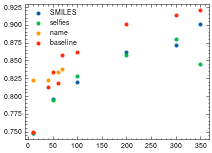

In [89]:
plt.scatter(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["accuracy"]["mean"],
    label="SMILES",
)


plt.scatter(
    compiled_classification_data_agg.loc["selfies"].index,
    compiled_classification_data_agg.loc["selfies"]["accuracy"]["mean"],
    label="selfies",
)

plt.scatter(
    compiled_classification_data_agg.loc["name"].index,
    compiled_classification_data_agg.loc["name"]["accuracy"]["mean"],
    label="name",
)

plt.scatter(
    compiled_baseline_data_agg.index,
    compiled_baseline_data_agg["baseline_accuracy"]["mean"],
    label="baseline",
)

plt.legend()


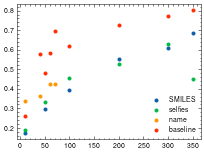

In [90]:
plt.scatter(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["f1_macro"]["mean"],
    label="SMILES",
)


plt.scatter(
    compiled_classification_data_agg.loc["selfies"].index,
    compiled_classification_data_agg.loc["selfies"]["f1_macro"]["mean"],
    label="selfies",
)

plt.scatter(
    compiled_classification_data_agg.loc["name"].index,
    compiled_classification_data_agg.loc["name"]["f1_macro"]["mean"],
    label="name",
)

plt.scatter(
    compiled_baseline_data_agg.index,
    compiled_baseline_data_agg["baseline_f1_macro"]["mean"],
    label="baseline",
)

plt.legend()


In [91]:
compiled_augmentation_data_agg = compiled_augmentation_data.groupby(
    ["representation", "include_canonical", "train_size"]
).agg(["mean", "std", mean_confidence_interval])


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_26009/1640352993.py:1: FutureWarning: ['mcc'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_augmentation_data_agg = compiled_augmentation_data.groupby(


In [92]:
compiled_augmentation_data_agg = compiled_augmentation_data_agg.loc['SMILES']


<ErrorbarContainer object of 3 artists>

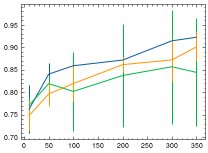

In [95]:
plt.errorbar(
    compiled_augmentation_data_agg.loc["True"].index,
    compiled_augmentation_data_agg.loc["True"]["accuracy"]["mean"],
    yerr=compiled_augmentation_data_agg.loc["True"]["accuracy"]["std"],
)

plt.errorbar(
    compiled_augmentation_data_agg.loc["False"].index,
    compiled_augmentation_data_agg.loc["False"]["accuracy"]["mean"],
    yerr=compiled_augmentation_data_agg.loc["False"]["accuracy"]["std"],
)

plt.errorbar(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["accuracy"]["mean"],
    yerr=compiled_classification_data_agg.loc["SMILES"]["accuracy"]["std"],
    label="SMILES",
)